In [1]:
from tool.functions import *
from tool.evaluation import *
#from tool.functions import *
#import random
#from tqdm import tqdm_notebook as tqdm
#import numpy as np, scipy.stats as st
#from itertools import islice

In [2]:
evaluation

<function tool.evaluation.evaluation(G, word, candidates, mode='exp', cutoff=4)>

In [2]:
lang1, lang2, n = 'spa','eng', 10
%time get_relevant_languages(lang1, lang2)
%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2))
%time l1, l2 = dictionaries(lang1, lang2)

Wall time: 996 ms
Wall time: 1.04 s
Wall time: 724 ms
Wall time: 1min 3s
Wall time: 6.03 s


In [3]:
def evaluation(G, word, candidates, mode='exp', cutoff=4):
    result = {}
    for translation in candidates:
        result[translation] = metric(G, word, translation, cutoff=cutoff, mode=mode)
    return result

def lemma_search (G, lemma, d_l1, l2, cutoff, n, metric='exp'):
    lemmas = [i for i in d_l1.lemma(lemma) if i in G.nodes()]
    results = {word:{} for word in lemmas}
    for word in lemmas:
        candidates = possible_translations(G, word, l2, cutoff=cutoff, n=n)
        results[word] = evaluation(G, word, candidates, mode = metric, cutoff=cutoff)
        del candidates
    return results

def metric(G, word, translation, cutoff, mode='exp'):
    coef = 0
    if mode in ('exp', 'len'):
        t = Counter([len(i) for i in nx.all_simple_paths(G, word, translation, cutoff=cutoff)])
        if mode == 'exp': 
            for i in t: 
                #coef += exp(-t[i])
                coef += exp(-i)*t[i]
            return coef
        if mode == 'len':
            for i in t: 
                coef += t[i]*i
            return coef
    if mode in ('log'):
        for path in nx.all_simple_paths(G, word, translation, cutoff=cutoff):
            for key, value in enumerate(path[1:]):
                coef -= G[path[key-1]][value]['weight']

In [25]:
%time print_lemma_results(lemma_search (G, 'star', l2, 'spa', 4, 40, metric='exp'), n = 5)

		 eng$star$[n_n-ND]
spa$estrella$[n-f_n_n-f-sg]	3.487083686952825
spa$astro$[n_n-m]	0.3445470134576176
spa$lucero$[n-m_n]	0.2963380437905006
spa$estelo$[n-m]	0.2712844579026809
spa$sentido$[n-m_n_n-m-ND]	0.15791432376100678

		 eng$star$[adj]
spa$estelar$[adj_adj-mf]	0.14032192213801603
spa$estupendo$[adj-GD_adj-GD-ND]	0.006737946999085467
spa$magnífico$[adj_adj-GD-ND_adj-GD]	0.006737946999085467

		 eng$star$[vblex]
spa$protagonizar$[vblex]	0.5861943804290437
spa$jugar$[vblex_vblex-vbact]	0.49363670887250133
spa$tocar$[vblex]	0.11938484387501619
spa$presentar$[vblex]	0.11074869476740849
spa$constar$[vblex]	0.09727280076923756

Wall time: 746 ms


In [24]:
%time print_lemma_results(lemma_search (G, 'star', l2, 'spa', 4, 40, metric='len'), n = 5)

		 eng$star$[n_n-ND]
spa$estrella$[n-f_n_n-f-sg]	1637
spa$astro$[n_n-m]	145
spa$lucero$[n-m_n]	138
spa$estelo$[n-m]	129
spa$sentido$[n-m_n_n-m-ND]	98

		 eng$star$[adj]
spa$estelar$[adj_adj-mf]	51
spa$estupendo$[adj-GD_adj-GD-ND]	5
spa$magnífico$[adj_adj-GD-ND_adj-GD]	5

		 eng$star$[vblex]
spa$jugar$[vblex_vblex-vbact]	294
spa$protagonizar$[vblex]	158
spa$tocar$[vblex]	79
spa$presentar$[vblex]	63
spa$actuar$[vblex]	60

Wall time: 776 ms


In [41]:
%time print_lemma_results(lemma_search (G, 'include', l2, 'spa', 4, 40, metric='exp'), n = 10)

		 eng$include$[n]
spa$inclusión$[n_n-f_n-f-sg]	0.09505449525293999

		 eng$include$[vblex-ger]
spa$implicación$[n-f_n_n-f-ND]	0.06548126788233244
spa$participación$[n-f_n_n-f-ND]	0.006737946999085467
spa$inclusión$[n_n-f_n-f-sg]	0.006737946999085467

		 eng$include$[vblex_vblex-pprs]
spa$comprender$[vblex]	1.0936909502681387
spa$incluir$[vblex]	1.0675870152154083
spa$coger$[vblex]	0.5389041357575773
spa$tomar$[vblex_vblex-inf]	0.24550763474911783
spa$añadir$[vblex]	0.1916040587564341
spa$llevar$[vblex]	0.18676431386587083
spa$dar$[vblex]	0.16949201565065547
spa$hacer$[vblex_vblex-inf]	0.14633663187135804
spa$agregar$[vblex]	0.1354821772474528
spa$participar$[vblex]	0.11938484387501619

Wall time: 1.44 s


In [43]:
%time print_lemma_results(lemma_search (G, 'convergence', l2, 'spa', 4, 40, metric='exp'), n = 10)

		 eng$convergence$[n_n-ND]
spa$convergencia$[n_n-f_n-f-ND]	0.663656474058993
spa$acuerdo$[n-m_n_n-m-sg]	0.0202138409972564
spa$confluencia$[n_n-f]	0.0202138409972564
spa$unión$[n_n-f_n-f-ND]	0.0202138409972564
spa$concordia$[n_n-f]	0.013475893998170934
spa$asociación$[n-f_n_n-f-sg]	0.013475893998170934
spa$armonía$[n-f_n_n-f-ND]	0.006737946999085467
spa$complicidad$[n_n-f_n-f-ND]	0.006737946999085467
spa$compromiso$[n-m_n_n-m-ND]	0.006737946999085467
spa$consenso$[n_n-m_n-m-sg]	0.006737946999085467

Wall time: 260 ms


In [3]:
import random
def get_evaluation_pairs(G, dictionary, target, n=500):
    k = 4
    pairs = []
    while len(pairs) < n:
        candidates = random.sample(dictionary, k*n)
        pairs = []
        for i in candidates:
            if i in G.nodes():
                s = FilteredList(list(G.neighbors(i))).lang(target)
                if len(s) == 1: pairs.append((i, s[0], n))
        print (k*n, len(pairs))
        k+=1
    return pairs[:n]

In [4]:
import random
def get_evaluation_pairs2(G, dictionary, target, n=500):
    k = 4
    pairs = []
    while len(pairs) < n:
        candidates = random.sample(dictionary, k*n)
        pairs = []
        for i in candidates:
            if i in G.nodes():
                ne = list(G.neighbors(i))
                s = FilteredList(ne).lang(target)
                if len(s) == 1 and len(ne) > 1: pairs.append((i, s[0], n))
        print (k*n, len(pairs))
        k+=1
    return pairs[:n]

with alternative ways

In [6]:
%time s = get_evaluation_pairs2(G, l1, 'eng', n=1000)

4000 613
5000 760
6000 907
7000 1024
Wall time: 503 ms


In [7]:
%time result = evaluate(G, s, 'spa', 'eng', 4)
sum(result)/10

Wall time: 1min 20s


66.69916143217807

In [5]:
import matplotlib.pyplot as plt

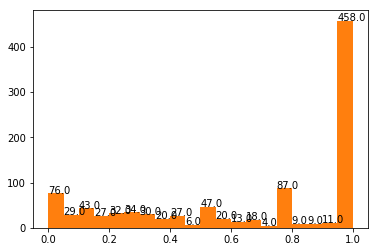

In [9]:
bins = 20
plt.hist(result, bins=bins)
arr=plt.hist(result,bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

all

In [10]:
%time s = get_evaluation_pairs(G, l1, 'eng', n=1000)

4000 786
5000 999
6000 1139
Wall time: 399 ms


In [11]:
%time result = evaluate(G, s, 'spa', 'eng', 4)
sum(result)/10

Wall time: 1min 35s


46.99383776955759

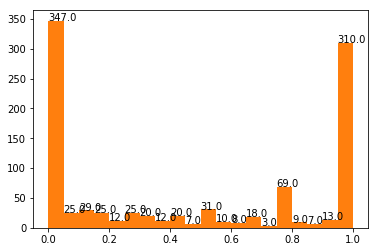

In [12]:
bins = 20
plt.hist(result, bins=bins)
arr=plt.hist(result,bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

# RUS - BEL

There is only one way through EPO (3k dictionary), so there are almost no chances to translate.

In [20]:
lang1, lang2, n = 'rus','bel', 10
%time get_relevant_languages(lang1, lang2)
%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2))
%time l1, l2 = dictionaries(lang1, lang2)

Wall time: 1.19 s
Wall time: 459 ms
Wall time: 709 ms
Wall time: 51.1 s
Wall time: 1.57 s


In [22]:
%time s = get_evaluation_pairs2(G, l1, lang2, n=1000)
%time result = evaluate(G, s, lang1, lang2, 4)
sum(result)/10

4000 899
5000 1150
Wall time: 190 ms
Wall time: 14.4 s


1.9998641350479587

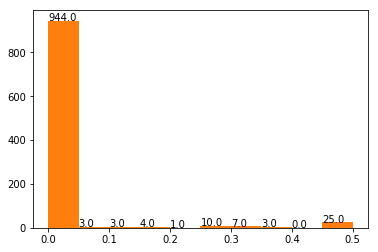

In [28]:
bins = 10
plt.hist(result, bins=bins)
arr=plt.hist(result,bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

In [29]:
%time s = get_evaluation_pairs(G, l1, lang2, n=1000)
%time result = evaluate(G, s, lang1, lang2, 4)
print(sum(result)/10)

4000 2096
Wall time: 103 ms
Wall time: 7.48 s
0.6375126262626261


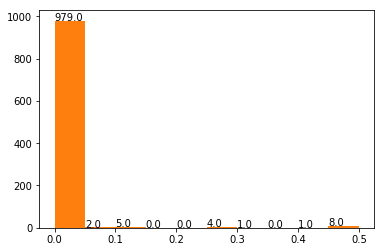

In [31]:
bins = 10
plt.hist(result, bins=bins)
arr=plt.hist(result,bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

# TAT-TUR

In [38]:
lang1, lang2, n = 'tat','tur', 10
%time get_relevant_languages(lang1, lang2)
%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2))
%time l1, l2 = dictionaries(lang1, lang2)

Wall time: 1.23 s
Wall time: 822 ms
Wall time: 411 ms
Wall time: 2min 39s
Wall time: 1.82 s


In [ ]:
%time s = get_evaluation_pairs2(G, l1, lang2, n=1000)
%time result = evaluate(G, s, lang1, lang2, 4)
sum(result)/10 #43.119560516452935

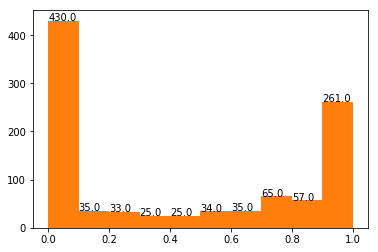

In [40]:
bins = 10
plt.hist(result, bins=bins)
arr=plt.hist(result,bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

In [ ]:
%time s = get_evaluation_pairs(G, l1, lang2, n=1000)
%time result = evaluate(G, s, lang1, lang2, 4)
print(sum(result)/10)

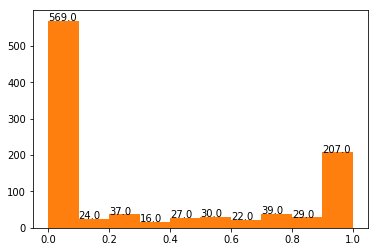

In [42]:
# 31.9586443643216
bins = 10
plt.hist(result, bins=bins)
arr=plt.hist(result,bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.show()

# Weighted graph

Get weights from stats

In [3]:
from math import log10
def make_weights_file():
    weights = {}
    with open ('./files/stats.csv', 'r', encoding='utf-8') as inp:
        for line in inp:
            data = line.split('\t')
            coef = 1/log10(10+float(data[2])*float(data[3])*float(data[4]))
            if coef < 1:
                weights['-'.join(data[:2])] = coef
    with open ('./tool/stats_dict.py', 'w', encoding='utf-8') as outp:
        outp.write('weights = '+str(weights))

In [4]:
make_weights_file()

In [2]:
from tool.stats_dict import weights

In [3]:
def built_from_file(file, weights):
    G = nx.DiGraph()
    #second = 
    for side, word1, word2 in nodes_from_file(file):
        pair = '{}-{}'.format(word1.lang, word2.lang)
        if pair in weights: w = weights[pair]
        else: w = 1
        if not side:
            G.add_edge(word1, word2, weight=w)
            G.add_edge(word2, word1, weight=w)
        elif side == 'LR': G.add_edge(word1, word2, weight=w)
        elif side == 'RL': G.add_edge(word2, word1, weight=w)
        else: pass #print (side)
    return G

In [4]:
lang1, lang2, n = 'eng','spa', 10
%time get_relevant_languages(lang1, lang2)
%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2), weights)
%time l1, l2 = dictionaries(lang1, lang2)

Wall time: 2.07 s
Wall time: 1.04 s
Wall time: 1.42 s
Wall time: 2min 27s
Wall time: 15.7 s


In [26]:
%time s = get_evaluation_pairs2(G, l1, lang2, n=1000)

4000 424
5000 518
6000 612
7000 731
8000 864
9000 1023
Wall time: 1.18 s


In [27]:
u, v = s[0][0], s[0][1]
u,v

(eng$belief$[n_n-ND], spa$creencia$[n_n-f_n-f-ND])

In [28]:
G[v]

AtlasView({cym$cred$[n-f]: {'weight': 0.3290714507517296}, eng$belief$[n_n-ND]: {'weight': 0.3290714507517296}, epo$kredo$[n]: {'weight': 0.3290714507517296}, eus$fede$[n]: {'weight': 0.3290714507517296}, fra$croyance$[n-f_n_n-f-ND]: {'weight': 0.3290714507517296}, arg$creyencia$[n_n-f]: {'weight': 0.3290714507517296}, cat$creença$[n_n-f]: {'weight': 0.3290714507517296}, glg$crenza$[n_n-f]: {'weight': 0.3290714507517296}, ita$fede$[n-f_n]: {'weight': 0.3290714507517296}})

In [29]:
G[u][v]['weight']

0.3290714507517296

In [ ]:
for path in nx.all_simple_paths(G, u, v, cutoff=5):
    print (path)
    for key, value in enumerate(path[1:]):
        print (G[path[key]])
        print (G[path[key]][value]['weight'])

In [15]:
%time s = get_evaluation_pairs2(G, l1, lang2, n=1000)
%time result = evaluate(G, s, lang1, lang2, 4, metric='log')
sum(result)/10

4000 411
5000 516
6000 647
7000 715
8000 877
9000 927
10000 1025
Wall time: 1.09 s


KeyError: arg$intanchible$[adj]

NameError: name 'result' is not defined

In [18]:
%time s = get_evaluation_pairs(G, l1, lang2, n=1000)
%time result = evaluate(G, s, lang1, lang2, 4)
print(sum(result)/10)

4000 795
5000 1024
Wall time: 315 ms
Wall time: 55.1 s
46.26606870189493


In [2]:
l = [1,2,3,4,5,6]
l[l<4]

TypeError: '<' not supported between instances of 'list' and 'int'

In [11]:
def pr_re_f1(lang1, lang2, n, cutoff):
    logging.info ('start preparations')
    lang1, lang2, n = 'eng','spa', 10
    get_relevant_languages(lang1, lang2)
    load_file(lang1, lang2, n=n)
    change_encoding('{}-{}'.format(lang1,lang2))
    G = built_from_file('{}-{}'.format(lang1,lang2))
    l1, l2 = dictionaries(lang1, lang2)
    s = get_evaluation_pairs(G, l1, lang2, n=n)
    logging.info ('start evaluation')
    result = evaluate(G, s, lang1, lang2, cutoff)
    precision = sum(1 for i in result if i > 0.8) / sum(1 for i in result if i > 0)
    recall = sum(1 for i in result if i > 0.8) / sum(1 for i in result)
    f1 = 2 * precision * recall / (precision + recall)
    logging.info ('finish evaluation')
    print ('Precision : {}, recall : {}, f1-score : {}'.format(precision, recall, f1))
    print (sum(result)/10)

In [12]:
%timeit pr_re_f1('eng', 'spa', 1000, 4)

2018-07-06 09:33:28,726 | INFO : start preparations
40 2
50 10
2018-07-06 09:34:42,329 | INFO : start evaluation
2018-07-06 09:34:42,535 | INFO : finish evaluation
Precision : 0.6666666666666666, recall : 0.4, f1-score : 0.5
0.4649404761904761
Wall time: 1min 14s


In [3]:
def two_node_search (G, node1, node2, l1, l2, cutoff, metric='exp'):
    if (node1, node2) in G.edges(): G.remove_edge(node1, node2)
    if (node2, node1) in G.edges(): G.remove_edge(node2, node1)
    res1 = node_search(G, node1, l2, cutoff, metric=metric)[:10]
    res2 = node_search(G, node2, l1, cutoff, metric=metric)[:10]
    coefficient = 0
    if node2 in res1: coefficient += 0.5*(10 - res1.index(node2))/10
    if node1 in res2: coefficient += 0.5*(10 - res2.index(node1))/10
    return coefficient

def _one_iter(lang1, lang2, G, k, l1, l2, cutoff=4, p=0.8):
    a = []
    candidates = random.sample(l1, k)
    pairs = []
    for i in candidates:
        if len(pairs) < 1000 and i in G.nodes():
            ne = list(G.neighbors(i))
            s = FilteredList(ne).lang(lang2)
            if len(s) == 1 and len(ne) > 1:
                pairs.append((i, s[0]))
        elif len(pairs) >= 1000:
            break
    if len(pairs) == 0:
        return 'no one-variant'
    pairs2 = pairs[:1000]
    result = evaluate(G, pairs2, lang1, lang2, 4)
    #del G, l1, l2, pairs
    try:
        precision = sum(1 for i in result if i >= p) / sum(1 for i in result if i > 0)
        recall = sum(1 for i in result if i >= p) / sum(1 for i in result)
        f1 = 2 * precision * recall / (precision + recall)
        logging.info ('finish evaluation')
        print ('Precision : {}, recall : {}, f1-score : {}'.format(precision, recall, f1))
        print (sum(result)/10)
    except:
        print ('error')
    del G, l1, l2, pairs

def eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=10, p=0.8):
    get_relevant_languages(lang1, lang2)
    load_file(lang1, lang2, n=n)
    change_encoding('{}-{}'.format(lang1,lang2))
    G = built_from_file('{}-{}'.format(lang1,lang2))
    l1, l2 = dictionaries(lang1, lang2)
    k = len(l1)
    if k > 10000: k =10000
    elif k < 1000: return 'less than 1000'
    else: k = len(l1)
    a = []
    #print ('+',end='\t')
    for _ in tqdm(range(n_iter)):
        G = built_from_file('{}-{}'.format(lang1,lang2))
        _one_iter(lang1, lang2, G, k, l1, l2, cutoff=cutoff)
    #print (a)
    #print (st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))    

In [2]:
lang1, lang2, n = 'eng','spa', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=10)

Precision : 0.9523809523809523, recall : 0.7, f1-score : 0.8069164265129684, 	Sum : 70.40000000000005
Precision : 0.9635627530364372, recall : 0.714, f1-score : 0.820218265364733, 	Sum : 71.62000000000003
Precision : 0.963013698630137, recall : 0.703, f1-score : 0.8127167630057803, 	Sum : 70.44000000000001
Precision : 0.9456233421750663, recall : 0.713, f1-score : 0.8129988597491448, 	Sum : 72.17999999999999
Precision : 0.9594594594594594, recall : 0.71, f1-score : 0.8160919540229885, 	Sum : 71.23500000000013
Precision : 0.9661246612466124, recall : 0.713, f1-score : 0.8204833141542002, 	Sum : 71.28000000000003
Precision : 0.9496021220159151, recall : 0.716, f1-score : 0.8164196123147093, 	Sum : 72.25000000000009
Precision : 0.9634146341463414, recall : 0.711, f1-score : 0.8181818181818182, 	Sum : 71.23500000000004
Precision : 0.9463087248322147, recall : 0.705, f1-score : 0.8080229226361031, 	Sum : 71.32500000000003
Precision : 0.9446693657219973, recall : 0.7, f1-score : 0.8041355542